<h1 align=center> Proceso de EDA </h1>

<h2>Instalacion de librerias </h2>


In [2]:
# %pip install -r ../requirements.txt

<h2> Importacion de libreria </h2>

In [3]:
import pandas as pd
import pyarrow
import gzip
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h2>Rutas </h2>

In [4]:
path = '../path.txt'

<h3 align=left> Funciones</h3>


In [5]:
def chequear_duplicados(data:pd.DataFrame) -> None:
    duplicados = data.duplicated().sum()
    total = len(data)
    porcentaje = round(duplicados/total*100,2)
    print(f'\nCantidad de duplicados: {duplicados:<7}      Porcentaje de duplicados: {str(porcentaje) + " %":<8}\n')
    if duplicados > 0:
         data = data.drop_duplicates()
         print(f'Se eliminaron {duplicados} registros duplicados.')


In [6]:
def testear_outliers(data: pd.DataFrame) -> None:
    columnas_outliers = []
    for columna in data.columns[2:]:
        omitir_columnas = ['zona_inicio', 'zona_fin', 'modalidad_pago', 'hora_inicio', 'hora_fin']
        if columna in omitir_columnas:
            continue
        q1 = data[columna][data[columna] > -1].quantile(0.25)
        q3 = data[columna][data[columna] > -1].quantile(0.75)
        iqr = q3 - q1
        modal = ''
        for valor in data[columna][data[columna] > -1].mode().to_list():
            modal += str(valor) + ', '
        modal = modal[:-2]
        promedio = round(data[columna][data[columna] > -1].mean(), 2)
        mediana = round(data[columna][data[columna] > -1].median(), 2)
        limite_superior = round(q3 + 1.5 * iqr, 2)
        limite_inferior = round(q1 - 1.5 * iqr, 2)
        if limite_inferior < 0:
            limite_inferior = 0
        outliers = data[columna][(data[columna] > limite_superior) | (data[columna] < limite_inferior)].count()
        if outliers > 0:
            columnas_outliers.append({'Columna': columna, 'Cantidad de outliers': outliers,
                                    'Límite inferior': limite_inferior, 'Límite superior': limite_superior,
                                    'Índices': data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)].index.to_list()})
        print(f'\nColumna: {columna:<20}\n\nModal: {modal:<24} Promedio: {promedio:<24} Mediana: {mediana:<24}\n\nLímite inferior: {limite_inferior:<14} Límite superior: {limite_superior:<17} Outliers: {outliers:<16}\n\n')
        bins = (int(data[columna].max() +1) if data[columna].max() <= 40 else 40)
        plt.figure(figsize=(3,3))
        plt.hist(data[columna][data[columna] > -1], bins=bins, edgecolor='black')
        plt.title(f'Histograma de {columna}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.show()
        print('\n\n')
        plt.figure(figsize=(3,3))
        plt.boxplot(data[columna][data[columna] > -1])
        plt.title(f'Boxplot de {columna}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.show()
        print('\n\n\n\n')

In [7]:
def tope_pasajeros(cantidad:int) -> int:
    if cantidad > 4:
        return int(-1)
    else:
        return int(cantidad)

In [8]:

def outliers_distancia(limite) -> None:
    columna_distancia_outliers = []
    q1 = df_taxis_verdes['distancia'][(df_taxis_verdes['distancia'] > -1) & (df_taxis_verdes['distancia'] < limite)].quantile(0.25)
    q3 = df_taxis_verdes['distancia'][(df_taxis_verdes['distancia'] > -1) & (df_taxis_verdes['distancia'] < limite)].quantile(0.75)
    iqr = q3 - q1
    modal = ''
    for valor in df_taxis_verdes['distancia'][(df_taxis_verdes['distancia'] > -1) & (df_taxis_verdes['distancia'] < limite)].mode().to_list():
        modal += str(valor) + ', '
    modal = modal[:-2]
    promedio = round(df_taxis_verdes['distancia'][(df_taxis_verdes['distancia'] > -1) & (df_taxis_verdes['distancia'] < limite)].mean(), 2)
    mediana = round(df_taxis_verdes['distancia'][(df_taxis_verdes['distancia'] > -1) & (df_taxis_verdes['distancia'] < limite)].median(), 2)
    limite_superior = round(q3 + 1.5 * iqr, 2)
    limite_inferior = round(q1 - 1.5 * iqr, 2)
    if limite_inferior < 0:
        limite_inferior = 0
    outliers = df_taxis_verdes['distancia'][(df_taxis_verdes['distancia'] > limite_superior) | (df_taxis_verdes['distancia'] < limite_inferior)].count()
    if outliers > 0:
        columna_distancia_outliers.append({'Columna': 'distancia', 'Cantidad de outliers': outliers,
                                'Límite inferior': limite_inferior, 'Límite superior': limite_superior,
                                'Índices': df_taxis_verdes[(df_taxis_verdes['distancia'] < limite_inferior) | (df_taxis_verdes['distancia'] > limite_superior)].index.to_list()})
    print(f'\nColumna: distancia\n\nModal: {modal:<24} Promedio: {promedio:<24} Mediana: {mediana:<24}\n\nLímite inferior: {limite_inferior:<14} Límite superior: {limite_superior:<17} Outliers: {outliers:<16}\n\n')
    plt.figure(figsize=(3,3))
    plt.hist(df_taxis_verdes['distancia'][(df_taxis_verdes['distancia'] > -1) & (df_taxis_verdes['distancia'] < limite)], bins=limite, edgecolor='black')
    plt.title(f'Histograma de distancia (límite {limite})')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

<h2>Exploracion</h2>


In [9]:
# Esta funcion se lee cada linea que se toma como una variables con un string asignado

with open(path, 'r') as archivo:
    for linea in archivo.readlines():
        exec(linea.strip(), globals())

In [10]:
df_taxis_verdes = pd.read_csv(ETL)

In [11]:
df_taxis_verdes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inicio           76518 non-null  object 
 1   fin              76518 non-null  object 
 2   zona_inicio      76518 non-null  int64  
 3   zona_fin         76518 non-null  int64  
 4   pasajeros        76518 non-null  int64  
 5   distancia        76518 non-null  float64
 6   tarifa_medida    76518 non-null  float64
 7   propina          76518 non-null  float64
 8   tarifa_total     76518 non-null  float64
 9   modalidad_pago   76518 non-null  float64
 10  recargo_trafico  76518 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 6.4+ MB


# Análisis

## Verificamos nulos

In [12]:
df_taxis_verdes.isnull().sum()

inicio             0
fin                0
zona_inicio        0
zona_fin           0
pasajeros          0
distancia          0
tarifa_medida      0
propina            0
tarifa_total       0
modalidad_pago     0
recargo_trafico    0
dtype: int64

## Verificamos duplicados:

In [13]:
chequear_duplicados(df_taxis_verdes)


Cantidad de duplicados: 0            Porcentaje de duplicados: 0.0 %   



## Verificamos outliers:


Columna: pasajeros           

Modal: 1                        Promedio: 1.19                     Mediana: 1.0                     

Límite inferior: 1.0            Límite superior: 1.0               Outliers: 40072           




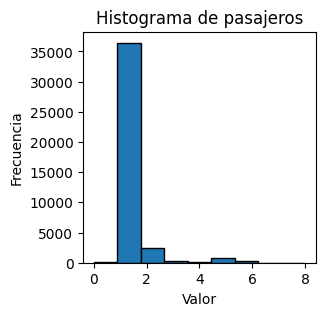

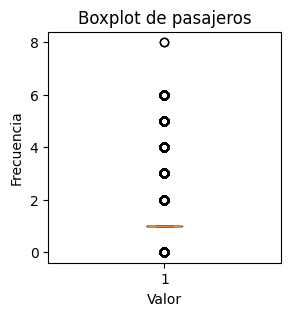







Columna: distancia           

Modal: 0.0                      Promedio: 40.86                    Mediana: 2.59                    

Límite inferior: 0              Límite superior: 12.45             Outliers: 6773            




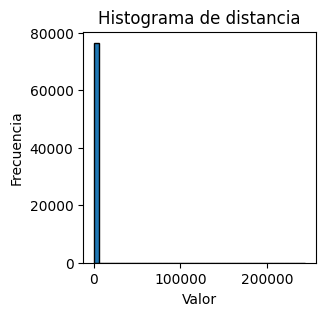

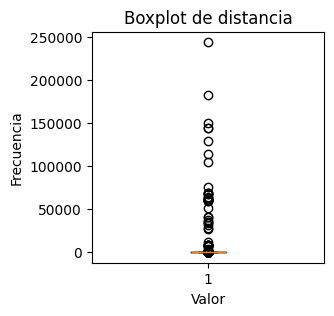







Columna: tarifa_medida       

Modal: 7.0                      Promedio: 19.97                    Mediana: 16.73                   

Límite inferior: 0              Límite superior: 50.25             Outliers: 3523            




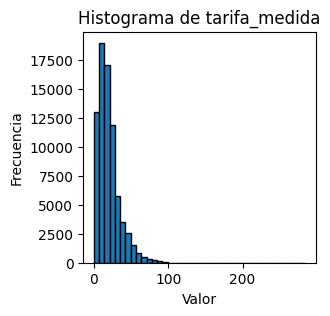

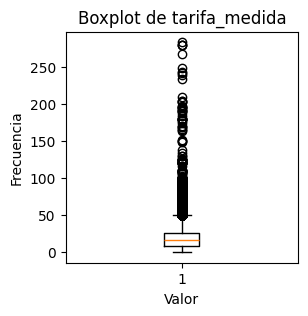







Columna: propina             

Modal: 0.0                      Promedio: 1.51                     Mediana: 1.16                    

Límite inferior: 0              Límite superior: 6.88              Outliers: 931             




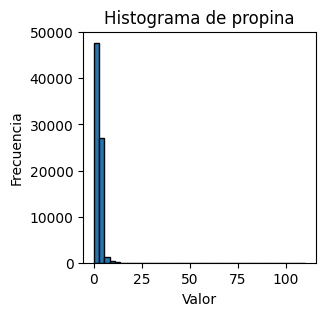

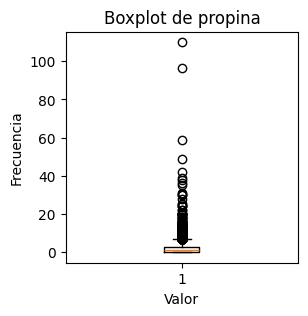







Columna: tarifa_total        

Modal: 7.8                      Promedio: 23.61                    Mediana: 20.64                   

Límite inferior: 0              Límite superior: 55.6              Outliers: 3850            




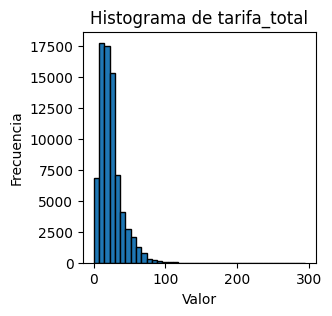

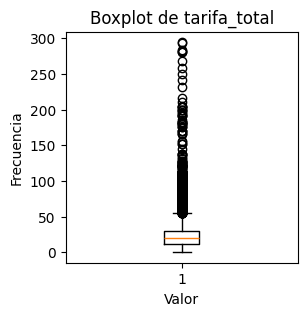







Columna: recargo_trafico     

Modal: 0.0                      Promedio: 0.61                     Mediana: 0.0                     

Límite inferior: 0.0            Límite superior: 0.0               Outliers: 45081           




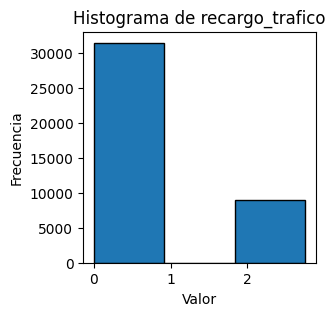

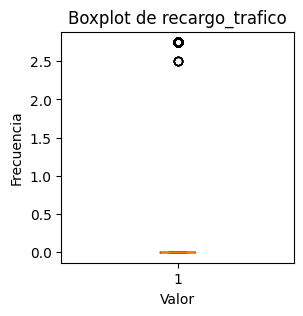

In [14]:
testear_outliers(df_taxis_verdes)

Vemos que hay varias cosas para revisar, por lo que debemos hacer un EDA más profundo para cada columna. Después hay que hacer una función para solucionar esos problemas y volver a revisar la función de outliers.

In [15]:
# for columna in df_taxis_verdes.columns[2:]:
#     print('\n\n')
#     print(df_taxis_verdes[columna][df_taxis_verdes[columna] < 0])


Vemos que hay muchos valores negativos. Primero hay que pasarlos a positivos y después convertir a -1 los NaN. Tiene que ser en ese orden para que no existan errores.

Replanteamos la transformación de datos, agregando el paso de pasar a positivos antes de la verificación de nulos.

## Exploración de outlier:

Vemos que hay muchos valores atípicos, por lo que es necesario hacer una exploración más profunda de las columnas con problemas. Para una primera revisión tomamos los valores de límite superior calculados analíticamente y luego veremos el ajuste de los rangos correspondientes.

### Columna 'pasajeros'

In [16]:
df_taxis_verdes[df_taxis_verdes['pasajeros'] >= 3.5].sample(5)

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
154,2021-01-01 09:53:06,2021-01-01 09:54:41,74,75,5,0.45,3.5,0.00,4.30,2.0,0.00
15532,2021-01-13 09:48:53,2021-01-13 09:56:13,75,236,5,1.41,7.0,2.11,12.66,1.0,2.75
29803,2021-01-23 17:34:44,2021-01-23 17:41:59,74,236,4,1.92,8.0,2.31,13.86,1.0,2.75
20657,2021-01-16 16:41:16,2021-01-16 16:53:41,75,116,6,2.81,11.0,0.00,11.80,2.0,0.00
1765,2021-01-02 21:28:47,2021-01-02 21:35:08,41,42,6,1.26,7.0,0.00,8.30,2.0,0.00


Vemos que hay registros con 5 o más pasajeros. Al no tener referncias sobre los vehículos, vamos a tomar 4 como el máximo permitido por norma en autos nuevos. Si es mayor, le asignamos -1.

In [17]:
df_taxis_verdes['pasajeros'] = df_taxis_verdes['pasajeros'].apply(tope_pasajeros)

### Columna 'distancia'

En los gráficos podemos ver que en esta columna, claramente, hay valores erróneos.

In [18]:
df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 20].nunique()

941

In [19]:
df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 100].unique()

array([1.5703000e+02, 2.4415201e+05, 1.2940250e+05, 7.6965000e+03,
       7.7005100e+03, 7.7026300e+03, 7.7093300e+03, 5.9187710e+04,
       4.0537960e+04, 2.3675000e+02, 3.7990540e+04, 6.2559750e+04,
       7.6742000e+02, 7.9762800e+03, 6.7315810e+04, 9.9986000e+02,
       6.2769500e+04, 1.8284032e+05, 6.7345570e+04, 6.2828790e+04,
       1.1359200e+03, 1.1620900e+03, 1.1788900e+03, 7.6058910e+04,
       1.3792100e+03, 1.3867900e+03, 1.5067201e+05, 8.3658800e+03,
       8.3614500e+03, 1.0193000e+02, 8.4036900e+03, 1.0909000e+02,
       8.4105700e+03, 1.3163000e+02, 1.1465363e+05, 8.4134500e+03,
       1.5829000e+02, 6.0132040e+04, 1.1671000e+02, 1.2201000e+02,
       2.7259490e+04, 3.4555600e+04, 6.4111730e+04, 4.0859880e+04,
       1.0528683e+05, 6.8656840e+04, 1.4497247e+05, 6.8855430e+04,
       1.1847320e+04, 3.1332100e+03, 5.1334010e+04, 2.7679860e+04,
       6.9045730e+04, 3.3160800e+03, 3.5388850e+04, 3.5396500e+04,
       6.0382700e+04, 1.4494819e+05, 3.1450040e+04])

Chequeamos algunos valores erróneos:

In [20]:
df_taxis_verdes[df_taxis_verdes['distancia'] > 19000]

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
9239,2021-01-08 14:10:14,2021-01-08 14:31:11,15,16,1,244152.01,8.00,2.75,11.05,1.0,0.0
41521,2021-01-02 20:48:00,2021-01-02 21:36:00,136,225,-1,129402.50,71.83,2.75,81.00,-1.0,-1.0
41934,2021-01-03 15:51:00,2021-01-03 16:21:00,32,43,-1,59187.71,35.79,2.75,38.84,-1.0,-1.0
43028,2021-01-04 13:38:00,2021-01-04 13:45:00,39,222,-1,40537.96,15.43,2.75,18.48,-1.0,-1.0
44748,2021-01-05 15:58:00,2021-01-05 16:33:00,197,155,-1,37990.54,48.85,2.75,51.90,-1.0,-1.0
45633,2021-01-06 10:53:00,2021-01-06 11:08:00,130,95,-1,62559.75,21.26,2.75,24.31,-1.0,-1.0
48242,2021-01-08 05:44:00,2021-01-08 06:03:00,174,250,-1,67315.81,29.45,2.75,32.50,-1.0,-1.0
49029,2021-01-08 13:01:00,2021-01-08 13:40:00,124,170,-1,62769.50,35.19,2.75,44.36,-1.0,-1.0
49258,2021-01-08 15:34:00,2021-01-08 16:27:00,159,189,-1,182840.32,50.83,2.75,60.00,-1.0,-1.0
49488,2021-01-08 19:22:00,2021-01-08 19:49:00,265,42,-1,67345.57,54.25,2.75,57.30,-1.0,-1.0


Borramos estos registros.

In [21]:
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes[df_taxis_verdes['distancia'] > 19000].index)

Vemos valores más chicos pero extraños.

In [22]:
df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 100].nunique()

28

In [23]:
df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 100].unique()

array([  157.03,  7696.5 ,  7700.51,  7702.63,  7709.33,   236.75,
         767.42,  7976.28,   999.86,  1135.92,  1162.09,  1178.89,
        1379.21,  1386.79,  8365.88,  8361.45,   101.93,  8403.69,
         109.09,  8410.57,   131.63,  8413.45,   158.29,   116.71,
         122.01, 11847.32,  3133.21,  3316.08])

In [24]:
df_taxis_verdes[df_taxis_verdes['distancia'] > 100].sample(3)

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
54663,2021-01-13 12:08:00,2021-01-13 12:12:00,97,97,-1,8413.45,19.15,2.75,22.20,-1.0,-1.0
65448,2021-01-22 05:09:00,2021-01-22 05:20:00,76,2,-1,3316.08,36.50,0.00,41.84,-1.0,-1.0
41701,2021-01-03 10:31:00,2021-01-03 10:43:00,35,61,-1,7700.51,16.73,2.75,19.78,-1.0,-1.0


Hay algunos valores que parecen erróneos. Revisamos todos.

In [25]:
df_taxis_verdes[df_taxis_verdes['distancia'] > 100]

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
5772,2021-01-06 09:21:13,2021-01-07 08:22:57,235,250,1,157.03,10.00,0.00,10.30,2.0,0.0
41700,2021-01-03 10:00:00,2021-01-03 10:17:00,17,77,-1,7696.50,23.31,2.75,26.36,-1.0,-1.0
41701,2021-01-03 10:31:00,2021-01-03 10:43:00,35,61,-1,7700.51,16.73,2.75,19.78,-1.0,-1.0
41750,2021-01-03 11:04:00,2021-01-03 11:12:00,61,35,-1,7702.63,16.73,2.75,19.78,-1.0,-1.0
41751,2021-01-03 11:52:00,2021-01-03 12:03:00,188,89,-1,7709.33,21.37,2.75,24.42,-1.0,-1.0
43582,2021-01-05 04:03:00,2021-01-05 04:33:00,38,170,-1,236.75,46.29,2.75,55.46,-1.0,-1.0
46703,2021-01-07 05:05:00,2021-01-07 05:29:00,205,170,-1,767.42,46.29,2.75,55.46,-1.0,-1.0
47312,2021-01-07 11:21:00,2021-01-07 12:01:00,17,39,-1,7976.28,23.31,2.75,26.36,-1.0,-1.0
48330,2021-01-08 07:18:00,2021-01-08 07:42:00,117,154,-1,999.86,42.11,2.75,47.45,-1.0,-1.0
49615,2021-01-09 05:41:00,2021-01-09 05:58:00,216,194,-1,1135.92,50.62,2.75,59.79,-1.0,-1.0


Borramos estos registros, ya que no hay mucha coherencia entre algunas distancias y tiempos de viaje y es una cantidad irrelevante sobre el total.

In [26]:
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes[df_taxis_verdes['distancia'] > 100].index)

Ahora revisamos en función del límite superior (6.14).

In [27]:
df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 6.14].count()

17758

In [28]:
df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 20].count()

1713


Columna: distancia

Modal: 0.0                      Promedio: 4.09                     Mediana: 2.5                     

Límite inferior: 0              Límite superior: 11.58             Outliers: 7590            




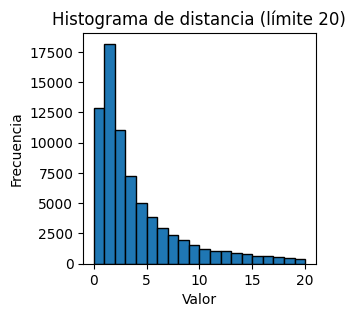

In [29]:
outliers_distancia(20)


Columna: distancia

Modal: 0.0                      Promedio: 4.36                     Mediana: 2.56                    

Límite inferior: 0              Límite superior: 12.12             Outliers: 7047            




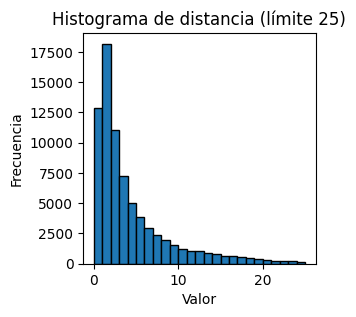

In [30]:
outliers_distancia(25)

Luego de revisar diversas fuentes para comprender mejor el contexto, entendemos que no es común tener viajes de más de 20 millas; estos viajes se realizan mediante otros medios de transporte. Además, nuestro análisis es para que una empresa de transporte de pasajeros de media y larga distancia (micros) evalúe la posibilidad de incorporar una flota de vehículos para viajes en la ciudad. Vamos a revisar el porcentaje de registros para distancias mayores a 20 millas:

In [31]:
cantidad = df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 20].count()
total = len(df_taxis_verdes)
porcentaje = round(cantidad / total * 100,2)
print(f'Total de registros: {total}    Cantidad de registros con distancia mayor a 20 millas: {cantidad}     Porcentaje: {porcentaje} %')


Total de registros: 76455    Cantidad de registros con distancia mayor a 20 millas: 1713     Porcentaje: 2.24 %


Dado que, además de lo expuesto previamente, es un porcentaje insignificante, eliminamos los registros.

In [32]:
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes['distancia'][df_taxis_verdes['distancia'] > 20].index)

### Columna 'tarifa medida'

In [33]:
df_taxis_verdes[(df_taxis_verdes['tarifa_medida']>0) & (df_taxis_verdes['distancia']==0)].count()

inicio             2445
fin                2445
zona_inicio        2445
zona_fin           2445
pasajeros          2445
distancia          2445
tarifa_medida      2445
propina            2445
tarifa_total       2445
modalidad_pago     2445
recargo_trafico    2445
dtype: int64

In [34]:
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes[(df_taxis_verdes['tarifa_medida']>0) & (df_taxis_verdes['distancia']==0)].index)

In [35]:
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes[(df_taxis_verdes['tarifa_medida']>300) & (df_taxis_verdes['distancia']<20)].index)

In [36]:
df_taxis_verdes[(df_taxis_verdes['tarifa_medida']>100) & (df_taxis_verdes['distancia']<5)].sample(5)

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
7008,2021-01-06 22:26:44,2021-01-06 22:27:32,248,248,1,0.14,191.0,0.0,191.3,2.0,0.0
8411,2021-01-07 21:01:19,2021-01-07 21:01:40,42,42,1,0.11,138.0,0.0,138.3,2.0,0.0
32373,2021-01-25 23:29:27,2021-01-25 23:29:41,147,147,1,0.07,110.0,0.0,110.3,2.0,0.0
27245,2021-01-21 22:50:48,2021-01-21 22:51:02,42,42,1,0.01,124.0,0.0,124.3,2.0,0.0
38321,2021-01-29 22:33:04,2021-01-29 22:33:19,116,116,1,0.10,117.0,0.0,117.3,2.0,0.0


In [37]:
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes[(df_taxis_verdes['tarifa_medida']>100) & (df_taxis_verdes['distancia']<5)].index)

In [38]:
df_taxis_verdes['tarifa_medida'].max()

179.0

In [39]:
df_taxis_verdes[df_taxis_verdes['tarifa_medida'] > 100].sample(5)

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
33295,2021-01-26 17:56:15,2021-01-26 18:51:59,89,156,1,16.54,101.53,0.00,107.95,2.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.00,1.20,181.00,1.0,0.0
17611,2021-01-14 15:42:58,2021-01-14 18:58:44,55,29,1,10.53,109.00,2.80,112.60,1.0,0.0
13926,2021-01-12 08:56:07,2021-01-12 11:49:46,185,241,1,17.04,110.00,2.75,113.55,1.0,0.0
25037,2021-01-20 13:49:54,2021-01-20 17:41:57,102,82,1,18.82,134.50,0.00,135.30,2.0,0.0


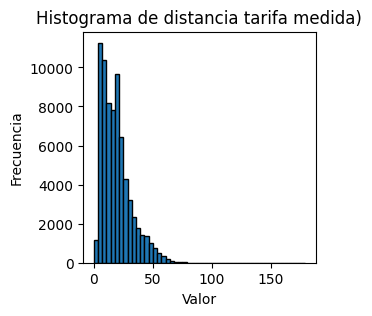

In [40]:
plt.figure(figsize=(3,3))
plt.hist(df_taxis_verdes['tarifa_medida'][df_taxis_verdes['tarifa_medida'] > -1], bins=50, edgecolor='black')
plt.title(f'Histograma de distancia tarifa medida)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

### Columna 'tarifa_total'

In [41]:
df_taxis_verdes[df_taxis_verdes['tarifa_total']> 150].sample(20, replace=True)

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0
34210,2021-01-27 12:45:01,2021-01-27 18:18:48,29,123,1,11.95,179.0,1.2,181.0,1.0,0.0


In [42]:
df_taxis_verdes.shape

(72289, 11)

Columna 'modalidad_pago'

In [43]:
df_taxis_verdes[df_taxis_verdes['modalidad_pago']==2].sample()

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
3691,2021-01-04 17:55:49,2021-01-04 18:05:30,263,238,1,1.45,8.5,0.0,13.05,2.0,2.75


In [44]:
df_taxis_verdes['modalidad_pago'][df_taxis_verdes['modalidad_pago'] == 2] = -1


Columna: pasajeros           

Modal: 1                        Promedio: 1.08                     Mediana: 1.0                     

Límite inferior: 1.0            Límite superior: 1.0               Outliers: 38228           




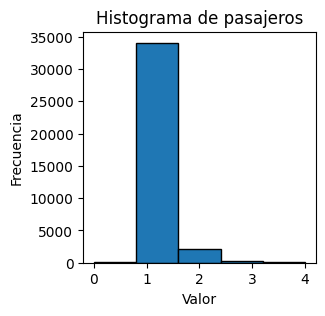

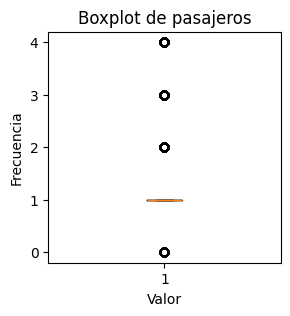







Columna: distancia           

Modal: 1.3                      Promedio: 4.23                     Mediana: 2.61                    

Límite inferior: 0              Límite superior: 11.9              Outliers: 5568            




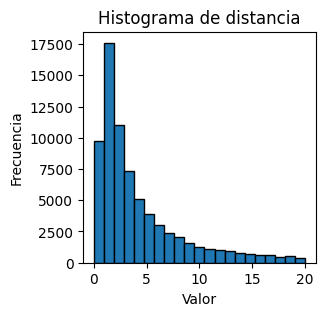

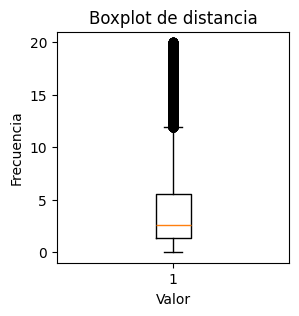







Columna: tarifa_medida       

Modal: 7.0                      Promedio: 18.9                     Mediana: 16.73                   

Límite inferior: 0              Límite superior: 48.08             Outliers: 2652            




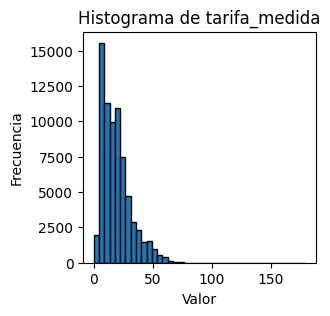

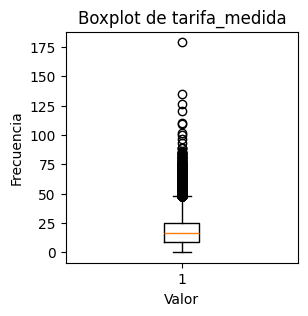







Columna: propina             

Modal: 0.0                      Promedio: 1.51                     Mediana: 1.26                    

Límite inferior: 0              Límite superior: 6.88              Outliers: 823             




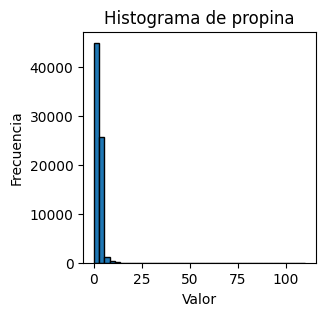

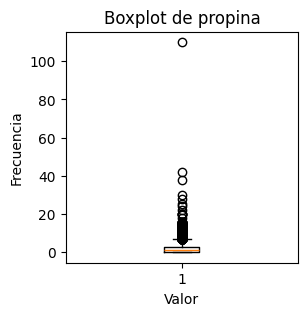







Columna: tarifa_total        

Modal: 7.8                      Promedio: 22.48                    Mediana: 20.06                   

Límite inferior: 0              Límite superior: 53.96             Outliers: 2735            




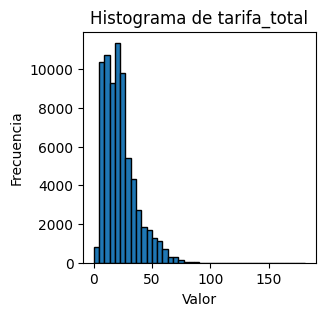

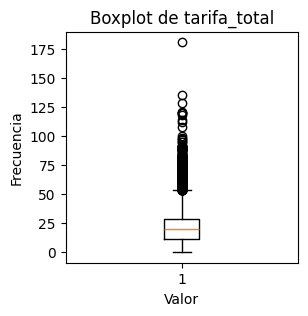







Columna: recargo_trafico     

Modal: 0.0                      Promedio: 0.65                     Mediana: 0.0                     

Límite inferior: 0.0            Límite superior: 0.0               Outliers: 43496           




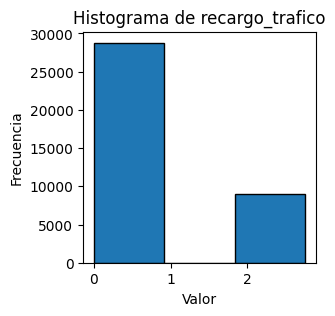

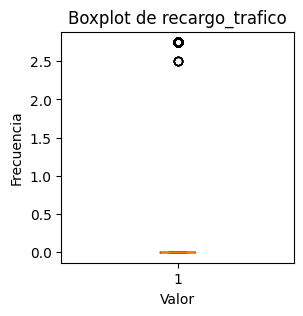

In [45]:
testear_outliers(df_taxis_verdes)

### Creamos columnas con horas, tiempo de viaje, días de la semana, para tener más datos para ver algún tipo de correlación.

In [46]:
df_taxis_verdes

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico
0,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1,1.01,5.50,0.00,6.80,-1.0,0.00
1,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1,2.53,10.00,2.81,16.86,1.0,2.75
2,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1,1.12,6.00,1.00,8.30,1.0,0.00
3,2020-12-31 23:57:51,2021-01-01 00:04:56,168,75,1,1.99,8.00,0.00,9.30,-1.0,0.00
7,2021-01-01 00:26:31,2021-01-01 00:28:50,75,75,-1,0.45,3.50,0.96,5.76,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
76513,2021-01-31 21:38:00,2021-01-31 22:16:00,81,90,-1,17.63,56.23,0.00,65.40,-1.0,-1.00
76514,2021-01-31 22:43:00,2021-01-31 23:21:00,35,213,-1,18.36,46.66,12.20,65.28,-1.0,-1.00
76515,2021-01-31 22:16:00,2021-01-31 22:27:00,74,69,-1,2.50,18.95,0.00,22.00,-1.0,-1.00
76516,2021-01-31 23:10:00,2021-01-31 23:37:00,168,215,-1,14.48,48.87,0.00,58.04,-1.0,-1.00


In [47]:
df_taxis_verdes['inicio'] = pd.to_datetime(df_taxis_verdes['inicio'])  # Convert if needed
df_taxis_verdes['fin'] = pd.to_datetime(df_taxis_verdes['fin'])  # Convert if needed

df_taxis_verdes['hora_inicio'] = df_taxis_verdes['inicio'].dt.hour
df_taxis_verdes['hora_fin'] = df_taxis_verdes['fin'].dt.hour

df_taxis_verdes['duracion_minutos'] = (df_taxis_verdes['fin'] - df_taxis_verdes['inicio']).dt.total_seconds() / 60


In [48]:
df_taxis_verdes.head(3)

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico,hora_inicio,hora_fin,duracion_minutos
0,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1,1.01,5.5,0.00,6.80,-1.0,0.00,0,0,3.933333
1,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1,2.53,10.0,2.81,16.86,1.0,2.75,0,0,8.750000
2,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1,1.12,6.0,1.00,8.30,1.0,0.00,0,0,5.966667


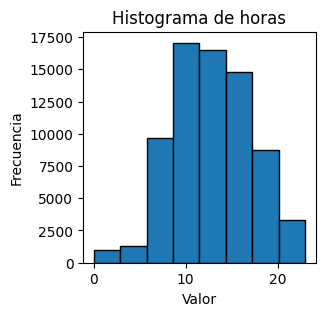

In [49]:
plt.figure(figsize=(3,3))
plt.hist(df_taxis_verdes['hora_inicio'], bins=8, edgecolor='black')
plt.title(f'Histograma de horas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [50]:
df_taxis_verdes[df_taxis_verdes['duracion_minutos']<0].head()

,inicio,fin,zona_inicio,zona_fin,pasajeros,distancia,tarifa_medida,propina,tarifa_total,modalidad_pago,recargo_trafico,hora_inicio,hora_fin,duracion_minutos


In [51]:
df_taxis_verdes[df_taxis_verdes['duracion_minutos']>100].count()

inicio              216
fin                 216
zona_inicio         216
zona_fin            216
pasajeros           216
distancia           216
tarifa_medida       216
propina             216
tarifa_total        216
modalidad_pago      216
recargo_trafico     216
hora_inicio         216
hora_fin            216
duracion_minutos    216
dtype: int64

In [52]:
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes[df_taxis_verdes['duracion_minutos']<0].index)
df_taxis_verdes = df_taxis_verdes.drop(df_taxis_verdes[df_taxis_verdes['duracion_minutos']>100].index)

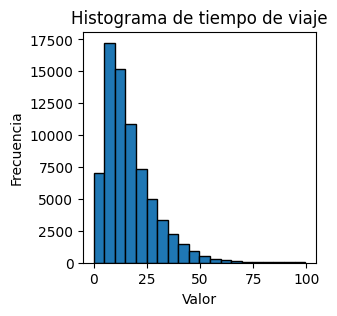

In [53]:
plt.figure(figsize=(3,3))
plt.hist(df_taxis_verdes['duracion_minutos'], bins=20, edgecolor='black')
plt.title(f'Histograma de tiempo de viaje')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [54]:
nombres_normalizados = {'inicio_viaje':'tpep_pickup_datetime', 'fin_viaje':'tpep_dropoff_datetime', 'pasajeros':'passenger_count',
                  'distancia':'trip_distance', 'zona_inicio':'pu_location_id', 'zona_fin':'do_location_id', 'tarifa_medida':'fare_amount',
                  'tarifa_total':'total_amount', 'recargo_trafico':'congestion_surcharge', 'modalidad_pago':'payment_type',
                  'propina':'tip_amount', 'hora_inicio':'star_time', 'hora_fin': 'end_time',  'duracion_minutos':'duration_minutes',
                     'dia_viaje':'trip_day'}

In [55]:
df_taxis_verdes.rename(columns=nombres_normalizados, inplace=True)

## Archivo final de análisis

In [56]:
df_taxis_verdes.to_csv(EDA, index=False)

In [57]:
matriz = df_taxis_verdes.iloc[:,:-1].corr()

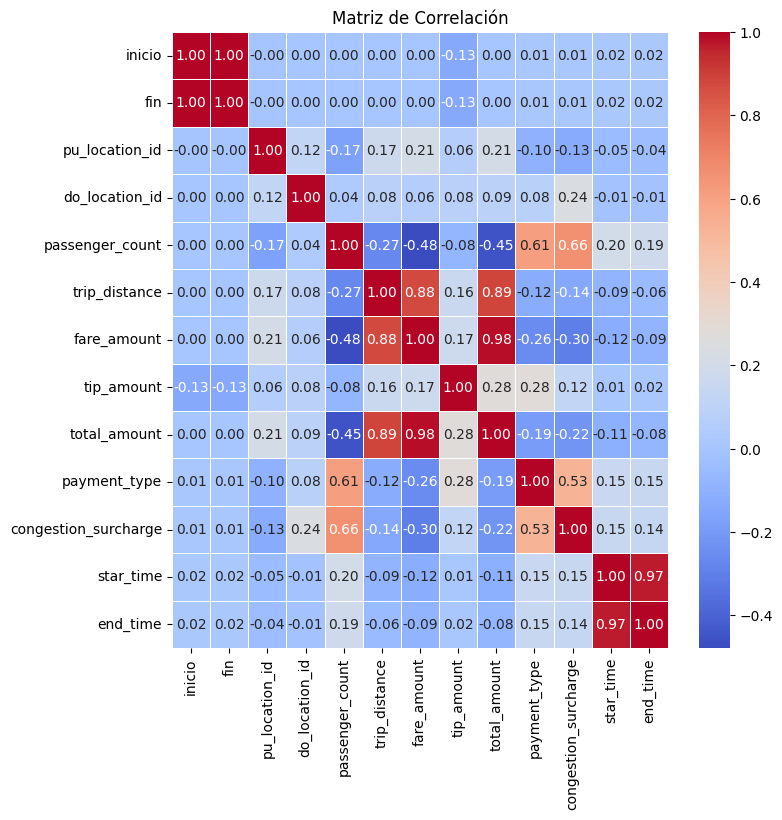

In [58]:
plt.figure(figsize=(8, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

No se observan correlaciones importantes, más allá de las obvias.